# Visualization Generator for Low-Risk People across Genres 

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from import_and_clean_data import generatePeopleDF

%matplotlib inline
%config InlineBackend.close_figure=False

In [2]:
# Generate DataFrame
df = generatePeopleDF('../data/tn.movie_budgets.csv.gz', '../data/im.db')
df

C:\Users\nicho\.conda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


primary_name  \
directors 0               Peter Jackson   
          1                Dean DeBlois   
          2     Rawson Marshall Thurber   
          3              James DeMonaco   
          4          Genndy Tartakovsky   
...                                 ...   
actors    1770           Parisse Boothe   
          1771          Timothy Johnson   
          1772           Jason Cavalier   
          1773               Scott Haze   
          1774                Pat Healy   

                                                       movie_info  num_movies  \
directors 0     [{'primary_title': 'The Hobbit: The Battle of ...           3   
          1     [{'primary_title': 'How to Train Your Dragon: ...           3   
          2     [{'primary_title': 'We're the Millers', 'genre...           3   
          3     [{'primary_title': 'The Purge', 'genres': ['ho...           3   
          4     [{'primary_title': 'Hotel Transylvania', 'genr...           3   
...                                                           ...         ...   
actors    1770  [{'primary_title': 'MacGruber', 'genres': ['ac...           4   
          1771  [{'primary_title': 'Carol', 'genres': ['drama'...           4   
          1772  [{'primary_title': 'Deadfall', 'genres': ['cri...           4   
          1773  [{'primary_title': 'Venom', 'genres': ['action...           4   
          1774  [{'primary_title': 'Compliance', 'genres': ['b...           4   

                                                           genres  \
directors 0                          [adventure, family, fantasy]   
          1                        [action, adventure, animation]   
          2          [action, thriller, comedy, adventure, crime]   
          3                    [horror, action, sci-fi, thriller]   
          4                [comedy, family, animation, adventure]   
...                                                           ...   
actors    1770  [sci-fi, action, thriller, comedy, romance, ad...   
          1771  [sci-fi, drama, action, thriller, horror, adve...   
          1772  [sci-fi, drama, action, thriller, adventure, r...   
          1773  [sci-fi, action, drama, thriller, mystery, war...   
          1774  [drama, history, horror, mystery, comedy, biog...   

                mean_total_gross  median_total_gross  std_total_gross  \
directors 0         1.246479e+09        1.218734e+09     6.431229e+07   
          1         7.280305e+08        7.124522e+08     5.737818e+07   
          2         3.784606e+08        3.725357e+08     3.714348e+07   
          3         1.787981e+08        1.830974e+08     2.123767e+07   
          4         6.201998e+08        6.392004e+08     8.547937e+07   
...                          ...                 ...              ...   
actors    1770      5.711876e+08        6.318974e+07     1.046935e+09   
          1771      5.688606e+08        6.376292e+07     1.048603e+09   
          1772      2.564239e+08        2.108569e+07     4.837437e+08   
          1773      2.749402e+08        1.542862e+07     5.281828e+08   
          1774      6.600278e+07        1.119958e+06     1.304339e+08   

                coefficient_of_variation profession  
directors 0                     0.051595   director  
          1                     0.078813   director  
          2                     0.098144   director  
          3                     0.118780   director  
          4                     0.137826   director  
...                                  ...        ...  
actors    1770                  1.832909      actor  
          1771                  1.843339      actor  
          1772                  1.886500      actor  
          1773                  1.921083      actor  
          1774                  1.976188      actor  

[2271 rows x 9 columns]

#### Observing differences between groups of people
As can be seen, the distribution of the coefficient of variation of box office revenue per person (more simply, <i/><b/>risk</b></i>) is virtually the same across directors, writers, and actors.

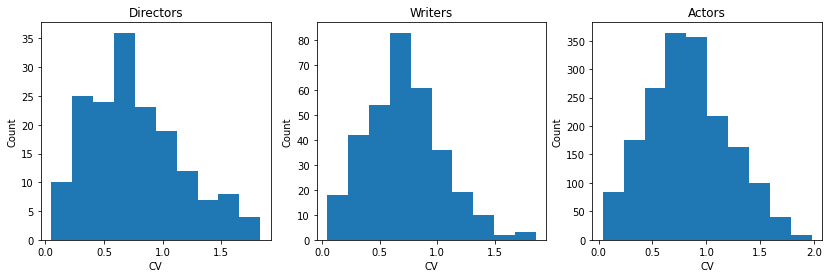

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(14,4))

bins = 10

ax[0].hist(df.loc['directors'].coefficient_of_variation, bins=bins)
ax[0].set_title('Directors')
ax[0].set_xlabel('CV')
ax[0].set_ylabel('Count')

ax[1].hist(df.loc['writers'].coefficient_of_variation, bins=bins)
ax[1].set_title('Writers')
ax[1].set_xlabel('CV')
ax[1].set_ylabel('Count')

ax[2].hist(df.loc['actors'].coefficient_of_variation, bins=bins)
ax[2].set_title('Actors')
ax[2].set_xlabel('CV')
ax[2].set_ylabel('Count');

In [27]:
# Modularized code into a function
def generatePeopleVisual(df, target_group, target_genre): # target_genre can be a string or a list
    # Eliminates people who are not relevant to the target genre
    spec_df = df.loc[target_group].copy()
    for row in df.loc[target_group].index:
        is_missing_genre = True
        for genre in df.loc[target_group].iloc[row].genres:
            if genre in target_genre:
                is_missing_genre = False
                break
        if(is_missing_genre):
            spec_df = spec_df.drop(row)
    
    # Generates the scatter plot
    fig, ax = plt.subplots(figsize=(8,6))
    
    ax.scatter(spec_df.mean_total_gross,
               spec_df.num_movies,
               c= spec_df.mean_total_gross,
               cmap='cool',
               marker='o',
               s=50)
    
    # Miscellaneous formatting
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=2.5)
    ax.set_yticks(range(min(spec_df.num_movies), max(spec_df.num_movies) + 1))
    ax.set_xticks(np.linspace(int(round(max(spec_df.mean_total_gross), -8) / 5), int(round(max(spec_df.mean_total_gross), -8)), num=5))
    ax.set_facecolor('#ffdaad')
    ax.ticklabel_format(style='plain')
    
    # Labels
    if(type(target_genre) == str):
        ax.set_title('Best-Performing ' + target_group.title() + ' in ' + target_genre.title() + ' Movies')
    elif(len(target_genre) == 1):
        ax.set_title('Best-Performing ' + target_group.title() + ' in ' + target_genre[0].title() + ' Movies')
    elif(len(target_genre) == 2):
        ax.set_title('Best-Performing ' + target_group.title() + ' in ' + target_genre[0].title() + \
                     ' & ' + target_genre[1].title() + ' Movies')
    else:
        ax.set_title('Best-Performing ' + target_group.title() + ' in ' + ', '.join(target_genre[0:-1]).title() + \
                    ', & ' + target_genre[-1].title() + ' Movies')
    ax.set_xlabel('Mean box office revenue earned')
    ax.set_ylabel('Number of movies')

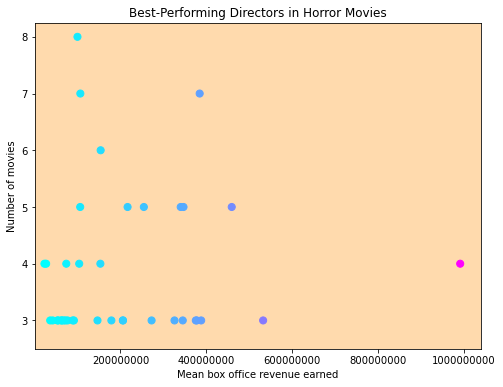

In [28]:
# Example use case
generatePeopleVisual(df, 'directors', 'horror')

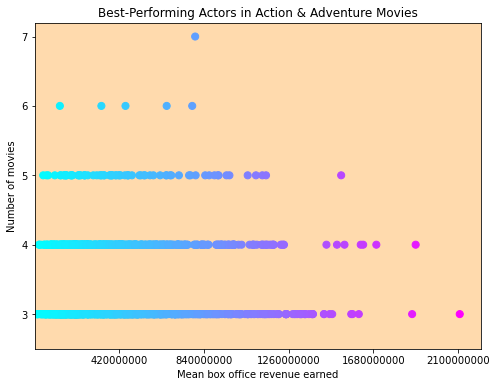

In [29]:
# Example use case
generatePeopleVisual(df, 'actors', ['action', 'adventure'])

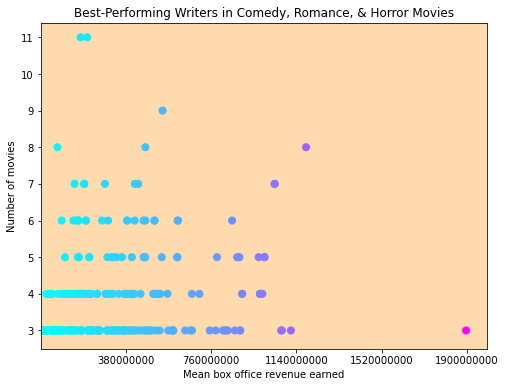

In [30]:
# Example use case
generatePeopleVisual(df, 'writers', ['comedy', 'romance', 'horror'])